In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

data_hr = pd.read_csv('HR.csv')
data_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
basic_statistics = data_hr.describe()
basic_statistics

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# Корреляционная матрица

num_vars = data_hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']]

correlation_matrix = num_vars.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [5]:
# Расчёт кол-ва сотрудников в каждом департаменте

employees_per_department = data_hr['department'].value_counts()
employees_per_department

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

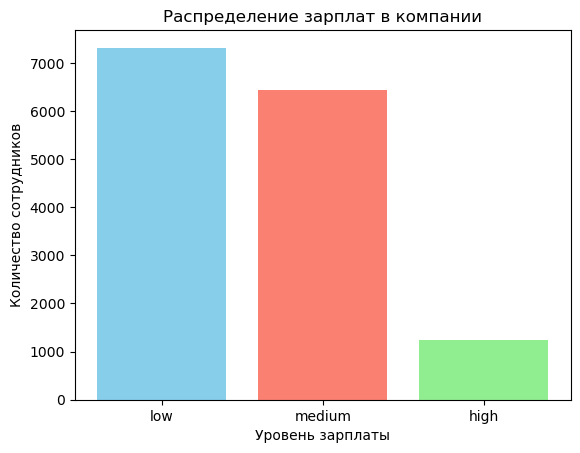

In [6]:
# Расчёт распределения сотрудников по ЗП
salary_distribution = data_hr['salary'].value_counts()
plt.bar(salary_distribution.index, salary_distribution.values, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Распределение зарплат в компании')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

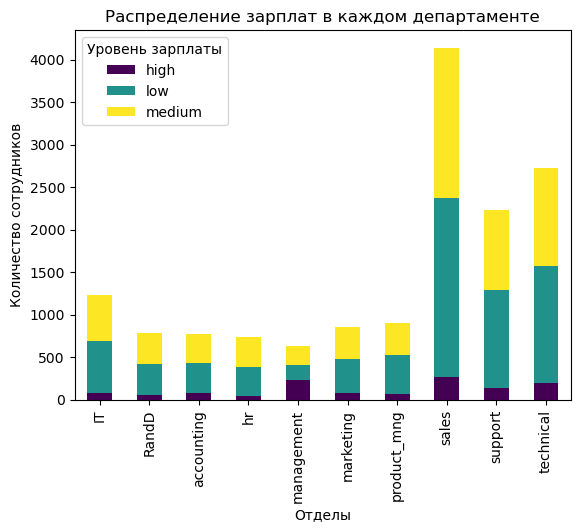

In [7]:
# Распределение зарплат в каждом департаменте
salary_per_department = data_hr.groupby(['department', 'salary']).size().unstack()
salary_per_department.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Распределение зарплат в каждом департаменте')
plt.xlabel('Отделы')
plt.ylabel('Количество сотрудников')
plt.legend(title='Уровень зарплаты')
plt.show()

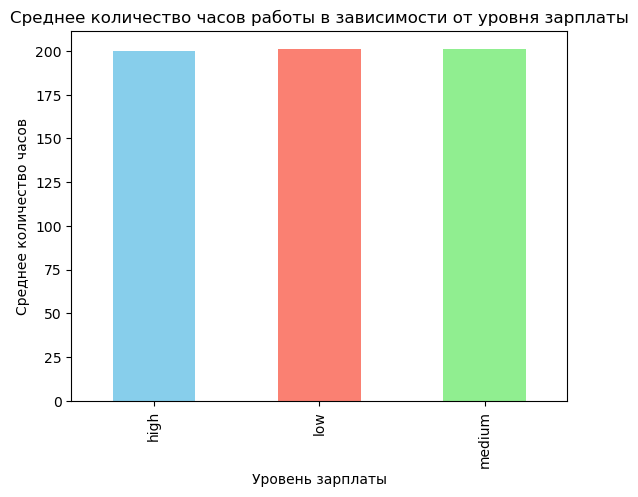

In [8]:
# Проверка гипотезы о времени на работе в зависимости от уровня зарплаты
salary_hours_relation = data_hr.groupby('salary')['average_montly_hours'].mean()
salary_hours_relation.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Среднее количество часов работы в зависимости от уровня зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Среднее количество часов')
plt.show()

In [9]:
# Анализ показателей для уволившихся и оставшихся сотрудников
left = data_hr[data_hr['left'] == 1]
stay = data_hr[data_hr['left'] == 0]

In [10]:
promotion_left = (left['promotion_last_5years'].mean()) * 100
promotion_stay = (stay['promotion_last_5years'].mean()) * 100
print(f'Процент уволившихся с повышением за последние 5 лет: {promotion_left:.2f}%')
print(f'Процент оставшихся с повышением за последние 5 лет: {promotion_stay:.2f}%')

Процент уволившихся с повышением за последние 5 лет: 0.53%
Процент оставшихся с повышением за последние 5 лет: 2.63%


In [11]:
satisfaction_left = left['satisfaction_level'].mean()
satisfaction_stay = stay['satisfaction_level'].mean()
print(f'Средняя удовлетворенность уволившихся: {satisfaction_left:.2f}')
print(f'Средняя удовлетворенность оставшихся: {satisfaction_stay:.2f}')

Средняя удовлетворенность уволившихся: 0.44
Средняя удовлетворенность оставшихся: 0.67


In [12]:
projects_left = left['number_project'].mean()
projects_stay = stay['number_project'].mean()
print(f'Среднее количество проектов уволившихся: {projects_left:.2f}')
print(f'Среднее количество проектов оставшихся: {projects_stay:.2f}')

Среднее количество проектов уволившихся: 3.86
Среднее количество проектов оставшихся: 3.79


In [13]:
# Разделение на обучающую и тестовую выборки
features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
X_train, X_test, y_train, y_test = train_test_split(data_hr[features], data_hr['left'], test_size=0.2, random_state=42)

In [14]:
# Построение модели LDA
lda_model = LDA()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
# Оценка качества модели на тестовой выборке
predictions = lda_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Точность модели LDA на тестовой выборке: {accuracy * 100:.2f}%')

Точность модели LDA на тестовой выборке: 75.33%
